In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code Boston_visuals.ipynb
import import_ipynb
import Boston_visuals as vs


importing Jupyter notebook from Boston_visuals.ipynb


In [2]:
# Load the Boston housing dataset
data = pd.read_csv('Datasets/housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

# Using numpy where possible as requested by the question, though this is sweeter using pandas directly.

# Minimum price of the data.  Can also do prices.min()
minimum_price = np.amin(prices)

# Maximum price of the data.  Can also do prices.max()
maximum_price = np.amax(prices)

# Mean price of the data.  Can also do prices.mean()
mean_price = np.mean(prices)

# Median price of the data.  Can also do prices.median()
median_price = np.median(prices)

# Standard deviation of prices of the data.  Can also do prices.std()
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))


Boston housing dataset has 489 data points with 4 variables each.
Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


In [3]:

# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    #print(y_true)
    #print(y_predict)
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

# Success
print("Training and testing split was successful.")



Model has a coefficient of determination, R^2, of 0.923.
Training and testing split was successful.


In [4]:

# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits=10, test_size = 0.20, random_state = 0)
    
    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth' : (1,2,3,4,5,6,7,8,9,10)}


    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))


Parameter 'max_depth' is 4 for the optimal model.


For Client 1 
 Total number of rooms in house : 5
For Client 2 
 Total number of rooms in house : 4
For Client 3 
 Total number of rooms in house : 8
For Client 1 
 Neighborhood poverty level (as %) : 17
For Client 2 
 Neighborhood poverty level (as %) : 32
For Client 3 
 Neighborhood poverty level (as %) : 3
For Client 1 
 Student-teacher ratio of nearby schools : 15
For Client 2 
 Student-teacher ratio of nearby schools : 22
For Client 3 
 Student-teacher ratio of nearby schools : 12
Predicted selling price for Client 1's home: $436,065.00
Predicted selling price for Client 2's home: $324,240.00
Predicted selling price for Client 3's home: $324,240.00
Press Enter to continue


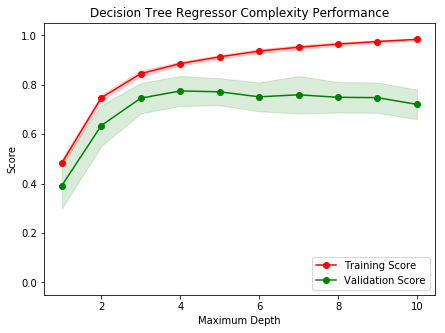

In [5]:
c11 = input('For Client 1 \n Total number of rooms in house : ')
c21 = input('For Client 2 \n Total number of rooms in house : ')
c31 = input('For Client 3 \n Total number of rooms in house : ')

c12 = input('For Client 1 \n Neighborhood poverty level (as %) : ')
c22 = input('For Client 2 \n Neighborhood poverty level (as %) : ')
c32 = input('For Client 3 \n Neighborhood poverty level (as %) : ')

c13 = input('For Client 1 \n Student-teacher ratio of nearby schools : ')
c23 = input('For Client 2 \n Student-teacher ratio of nearby schools : ')
c33 = input('For Client 3 \n Student-teacher ratio of nearby schools : ')

# Produce a matrix for client data
#client_data = [[5, 17, 15], # Client 1
               #[4, 32, 22], # Client 2
               #[8, 3, 12]]  # Client 3

client_data = [[c11, c21, c31], # Client 1
               [c12, c22, c32], # Client 2
               [c13, c23, c33]]  # Client 3


# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))
input("Press Enter to continue")
#Complexity Check
vs.ModelComplexity(X_train, y_train)